<a href="https://colab.research.google.com/github/Erick-Cantagallo/Genetical-Algorithm-Project/blob/main/Genetical_Algorithm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se der Erro na hora de rodar com o numpy padrão da ultima versão, então colocar a versão 1.26.4

In [1]:
!python -m pip install pandas geneticalgorithm numpy scikit-learn xgboost pygad ucimlrepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=d89bd62ecdb74201e11802f4a4c0a487210c3eb436ab9ba1d8182104a4cc4f8c
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


# About the project


<div>
<img src="header.png" width="700"/>
</div>

# Import Libraries

In [2]:
#Pandas Para leitura, manipulação e extração dos Dados; Numpy para arrumar os Vetores/Matrizes.
import pandas as pd
import numpy as np
import seaborn as sns

#Importar o Data_Set da Internet.
from ucimlrepo import fetch_ucirepo

#Para Regressão:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

#Genetical Algorithm
import pygad
#-----------
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option("display.max_columns", None)

In [3]:
# Carregar e preparar os dados
df = fetch_ucirepo(id=165)['data']['original']
col_rename = [x.split('(')[0].strip().lower().replace(' ', '_') for x in df.columns]
df.columns = col_rename


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


[]

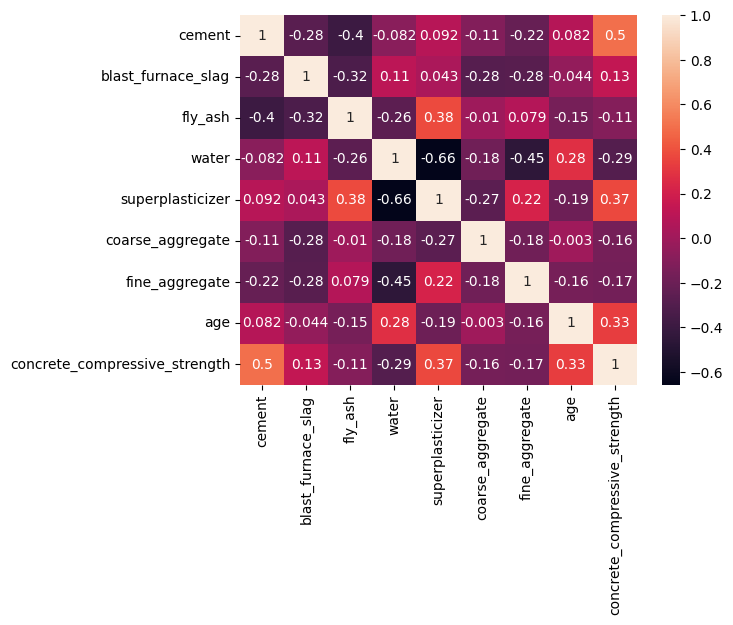

In [6]:
#Mapa de Calor para visualizar a Correlação entre as Features "X" que afetam o nosso Target "y".
sns.heatmap(df.corr(), annot=True).plot()

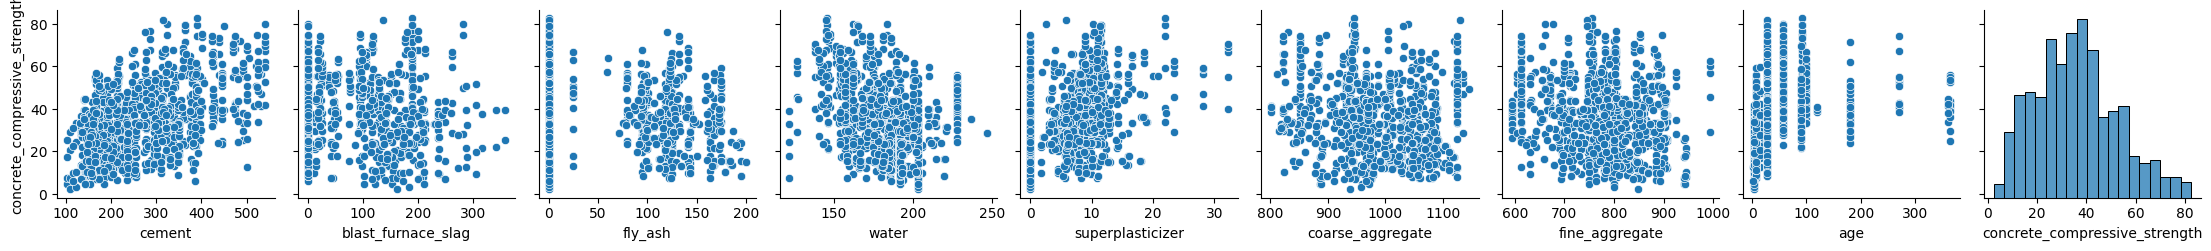

In [7]:
#Plotando para ver uma relação visual entre a Endurance do Concreto e as Demais Variáveis.
sns.pairplot(df, y_vars=['concrete_compressive_strength'])

# Model training and Optimization (Genetical Algorithm)

In [8]:
#Para visualização das Métricas. Para então utilização da Métrica no scoring Abaixo "scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']"
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [9]:
# Treinando o modelo preditivo utilizando GradientBosstingRegressor. No Melhor caso encontrado chegando a um total de "-0.2129(21,29%)" de erro e uma Accuracy de 79,71%.
X = df.drop('concrete_compressive_strength', axis=1)
y = df['concrete_compressive_strength']

modelo = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, subsample=0.8, random_state=42)
result = cross_validate(modelo, X, y, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], cv=10)
display({key:sum(item)/len(item) for key, item in result.items()})

{'fit_time': np.float64(1.3393076658248901),
 'score_time': np.float64(0.004363560676574707),
 'test_neg_mean_absolute_error': np.float64(-5.8679006181571705),
 'test_neg_mean_absolute_percentage_error': np.float64(-0.2129175374338515)}


Melhor solução encontrada:
cement: 459.94
blast_furnace_slag: 286.15
fly_ash: 48.06
water: 146.97
superplasticizer: 10.96
coarse_aggregate: 1143.14
fine_aggregate: 722.67
age: 116.96

Resistência prevista: 89.50 MPa


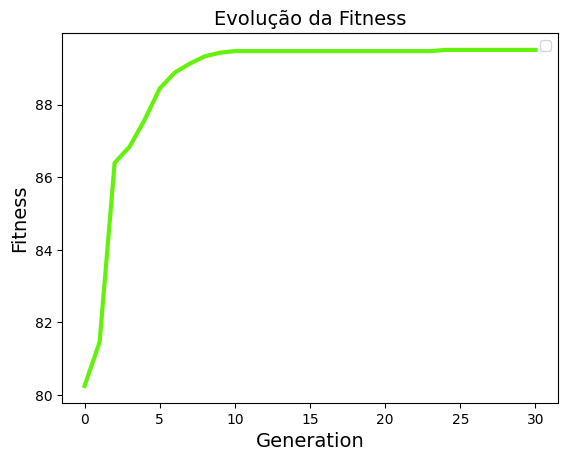

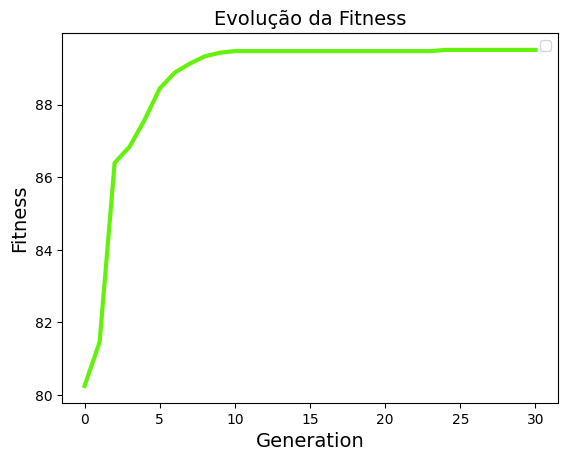

In [10]:
# Limites das variáveis
varbound = np.array([[int(X[col].min()), int(X[col].max())] for col in X.columns])
lower_bounds = varbound[:, 0]
upper_bounds = varbound[:, 1]


# Função de fitness para a utilização do PyGAD
modelo.fit(X,y)
def fitness_func(ga_instance, solution, solution_idx):
    solution_reshaped = np.array(solution).reshape(1, -1)
    prediction = modelo.predict(solution_reshaped)[0]
    return prediction  # Maximizar diretamente

# Número de variáveis (genes)
num_genes = X.shape[1]

# Parâmetros do GA com PyGAD
ga_instance = pygad.GA(
    num_generations=30,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=200,
    num_genes=num_genes,
    init_range_low=lower_bounds,
    init_range_high=upper_bounds,
    gene_space=[{'low': l, 'high': h, 'step': 0.01} for l, h in zip(lower_bounds, upper_bounds)],
    mutation_percent_genes=10,
    mutation_type="random",
    crossover_type="single_point",
    parent_selection_type="sss",
    keep_parents=10,
    allow_duplicate_genes=True,
    random_seed=42
)

# Executar GA
ga_instance.run()

# Mostrar melhor solução
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("\nMelhor solução encontrada:")
for name, value in zip(X.columns, solution):
    print(f"{name}: {float(value):.2f}")
print(f"\nResistência prevista: {solution_fitness:.2f} MPa")

# Plotar curva de fitness
ga_instance.plot_fitness(title="Evolução da Fitness")

# O Código Abaixo Trata-se da Segunda forma de Regressão, Porém Como visualizado acima, o "GradientBoostingRegressor" Acaba por ser o mais eficáz nesse caso específico, Trazendo consigo 79,71% de Acertividade(Accuracy)


Métricas do Modelo XGBoost:
→ MSE: 5.91
→ MAE: 1.66
→ R²: 0.9788

Melhor solução encontrada:
cement: 407.63
blast_furnace_slag: 171.30
fly_ash: 19.67
water: 144.71
superplasticizer: 10.43
coarse_aggregate: 937.03
fine_aggregate: 745.38
age: 299.37

Resistência prevista: 80.85 MPa


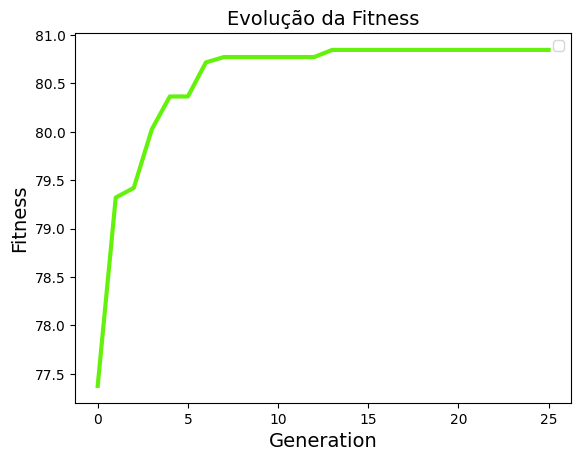

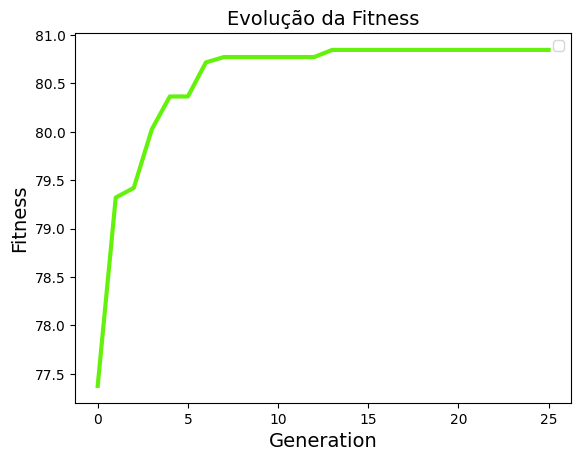

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinando o modelo preditivo
X = df.drop('concrete_compressive_strength', axis=1)
y = df['concrete_compressive_strength']

modelo = XGBRegressor(n_estimators=500, learning_rate=0.01, random_state=42)
modelo.fit(X, y)

# Avaliar o desempenho do modelo
y_pred = modelo.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMétricas do Modelo XGBoost:")
print(f"→ MSE: {mse:.2f}")
print(f"→ MAE: {mae:.2f}")
print(f"→ R²: {r2:.4f}")

# --------------------------------------------------------------------------------------------------------
# Limites das variáveis
varbound = np.array([[int(X[col].min()), int(X[col].max())] for col in X.columns])
lower_bounds = varbound[:, 0]
upper_bounds = varbound[:, 1]

# --------------------------------------------------------------------------------------------------------
# Função de fitness para PyGAD
def fitness_func(ga_instance, solution, solution_idx):
    solution_reshaped = np.array(solution).reshape(1, -1)
    prediction = modelo.predict(solution_reshaped)[0]
    return prediction  # Maximizar diretamente

# Número de variáveis (genes)
num_genes = X.shape[1]

# Parâmetros do GA com PyGAD
ga_instance = pygad.GA(
    num_generations=25,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=400,
    num_genes=num_genes,
    init_range_low=lower_bounds,
    init_range_high=upper_bounds,
    gene_space=[{'low': l, 'high': h, 'step': 0.01} for l, h in zip(lower_bounds, upper_bounds)],
    mutation_percent_genes=10,
    mutation_type="random",
    crossover_type="single_point",
    parent_selection_type="sss",
    keep_parents=10,
    allow_duplicate_genes=True,
    random_seed=42
)

# Executar GA
ga_instance.run()

# Mostrar melhor solução
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("\nMelhor solução encontrada:")
for name, value in zip(X.columns, solution):
    print(f"{name}: {float(value):.2f}")
print(f"\nResistência prevista: {solution_fitness:.2f} MPa")

# Plotar curva de fitness
ga_instance.plot_fitness(title="Evolução da Fitness")
